In [ ]:
pip install pandas numpy matplotlib


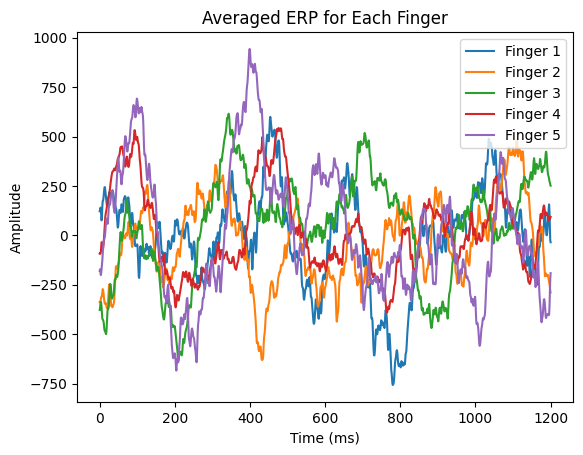

Shape of the ERP matrix: (5, 1201)
ERP matrix:
 [[ 121.5859375   128.078125    140.1796875  ...   42.8125
   -23.765625    -34.859375  ]
 [-337.725      -338.28333333 -334.625      ... -263.21666667
  -278.08333333 -289.5       ]
 [-377.33333333 -367.99166667 -346.64166667 ...  265.88333333
   258.375       251.18333333]
 [ -92.44736842  -89.54210526  -91.61578947 ...   81.10526316
    87.2          93.63684211]
 [-180.35135135 -171.59459459 -185.48648649 ... -294.05405405
  -222.86486486 -191.21621622]]

The matrix as a df:


,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,121.585938,128.078125,140.179688,135.187500,101.851562,75.820312,97.250000,147.015625,173.390625,176.007812,...,14.507812,38.531250,65.179688,95.734375,136.234375,156.531250,120.414062,42.812500,-23.765625,-34.859375
1,-337.725000,-338.283333,-334.625000,-323.558333,-313.175000,-309.916667,-304.900000,-288.475000,-272.091667,-274.891667,...,-206.058333,-201.683333,-200.783333,-210.908333,-227.050000,-236.250000,-246.375000,-263.216667,-278.083333,-289.500000
2,-377.333333,-367.991667,-346.641667,-336.325000,-344.958333,-365.325000,-396.366667,-421.033333,-426.291667,-428.466667,...,348.725000,325.716667,309.966667,302.316667,295.416667,284.133333,273.916667,265.883333,258.375000,251.183333
3,-92.447368,-89.542105,-91.615789,-84.073684,-58.947368,-34.610526,-37.057895,-58.847368,-71.147368,-65.352632,...,106.505263,98.752632,87.463158,74.931579,74.200000,79.394737,79.300000,81.105263,87.200000,93.636842
4,-180.351351,-171.594595,-185.486486,-201.135135,-192.472973,-170.932432,-151.108108,-126.689189,-96.783784,-61.797297,...,-399.918919,-399.878378,-397.675676,-399.310811,-404.148649,-400.108108,-364.783784,-294.054054,-222.864865,-191.216216


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calc_mean_erp(trial_points_file, ecog_data_file):
    # Load and process trial points data
    trial_points_df = pd.read_csv(trial_points_file, header=None, names=["start", "peak", "finger"])
    
    # Convert relevant columns to integer type
    trial_points_df = trial_points_df.astype({"start": int, "peak": int, "finger": int})

    # Load ECoG data
    ecog_data_series = pd.read_csv(ecog_data_file, header=None).iloc[:, 0]

    # Initialize storage for signals for each finger
    finger_signals = {finger: [] for finger in range(1, 6)}

    # Extract blocks of 1201 points for each trial
    for _, row in trial_points_df.iterrows():
        start_idx = row["start"]
        finger = row["finger"]

        # Define the block: 200 ms before, 1 ms at start, 1000 ms after
        block_start = start_idx - 200
        block_end = start_idx + 1000

        if block_start >= 0 and block_end < len(ecog_data_series):
            block = ecog_data_series[block_start:block_end + 1].values
            finger_signals[finger].append(block)

    # Compute mean ERP for each finger
    fingers_erp_mean = []
    for finger in range(1, 6):
        # Average across all trials for the finger
        if finger_signals[finger]:  # Ensure there are trials for the finger
            finger_mean = np.mean(finger_signals[finger], axis=0)
        else:
            finger_mean = np.zeros(1201)  # Handle missing trials with a zero array
        fingers_erp_mean.append(finger_mean)

        # Plot the ERP for the finger
        plt.plot(finger_mean, label=f'Finger {finger}')
    
    plt.title('Averaged ERP for Each Finger')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    # Convert to 5x1201 matrix
    fingers_erp_mean = np.array(fingers_erp_mean)
    return fingers_erp_mean

# Example usage with your filenames
if __name__ == "__main__":
    trial_points_file = "events_file_ordered.csv"
    ecog_data_file = "brain_data_channel_one.csv"

    fingers_erp_mean = calc_mean_erp(trial_points_file, ecog_data_file)
    print("Shape of the ERP matrix:", fingers_erp_mean.shape)
    print("ERP matrix:\n", fingers_erp_mean)

#1
# Save the results into a CSV file 
fingers_erp_mean_df = pd.DataFrame(fingers_erp_mean)
fingers_erp_mean_df.to_csv('fingers_erp_mean_output.csv', index=False)

# Display the results as a df
print("\nThe matrix as a df:") 
fingers_erp_mean_df
